När man arbetar med AI appliceringar är datan i många sammanhang en central del. 
Därför behöver man förstå och utforska datan. Det brukkar kallas för "Exploratory Data Analysis" (EDA).

I denna kunskapskontrollen har du ett dataset som heter "housing". Gör en utforskande analys där du t.ex. kan utföra visualiseringar, 
beräkningar samt bearbeta datan för att se om det exempelvis finns saknade värden i den. 

Målet är att man ska kunna läsa skriptet och följa din analys av datan. Exempelvis: Vilka hus är dyrare/billigare? Varför?

In [2]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colormaps
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm, colors
import cartopy.crs as ccrs
import folium


In [3]:
# Read file into a data frama
df_original = pd.read_csv(r'C:\Users\oscar\Documents\NBI_Handelsakademin\Kurs1_Python_och_AI_Strategi\Kunskapskontroll_1_o_2\housing.csv')

df_original.info()

# Save old number of data rows and print value
old_num = df_original.shape[0]

print()
print(df_original.shape[0])

# Drop empty rows
df_cleaned = df_original.dropna()

# Show new number of lines after dropping empty data and give percent of retained data based on row numbers
print(df_cleaned.shape[0])
x =  round((((df_cleaned.shape[0]/old_num)*100)), 3)
print(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

20640
20433
98.997


In [4]:
# Show first ten rows to see headers and structure of data
print(df_cleaned.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [5]:
# Finding max and min range of geographical placement of data points for plot layout

longitude_min = df_cleaned['longitude'].max() 
longitude_max = df_cleaned['longitude'].min() 
 
latitude_min = df_cleaned['latitude'].max() 
latitude_max = df_cleaned['latitude'].min() 
 
print(longitude_min)
print(longitude_max)

print(latitude_min)
print(latitude_max)

-114.31
-124.35
41.95
32.54


In [6]:

value = np.array(df_cleaned['median_house_value'])

# Using numpy to find max and min of the average hous prices per area 
print(np.max(value))
print(np.min(value), '\n')

# Using pandas to find max and min
max_price = df_cleaned['median_house_value'].max()
min_price = df_cleaned['median_house_value'].min()

print(max_price)
print(min_price)


500001.0
14999.0 

500001.0
14999.0


In [7]:
# Read Lat an Lon data into variables to create basic scatter plot over all data points
x = np.asarray(df_cleaned['longitude']) 
y = np.asarray(df_cleaned['latitude'])

# Array for color palette based on housing prices
z = np.asarray(df_cleaned['median_house_value'])


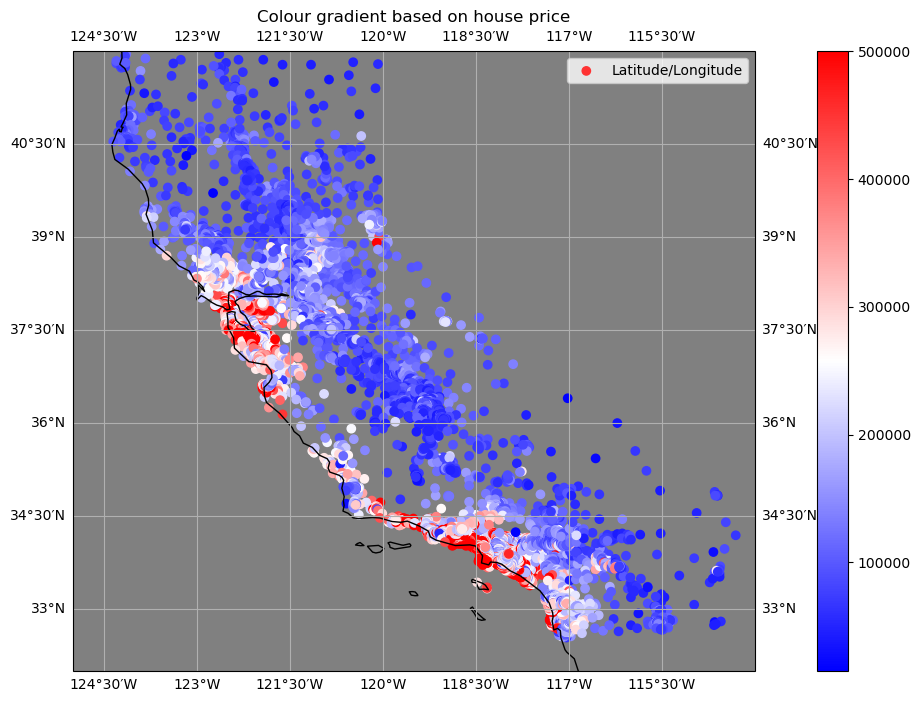

In [21]:
# Create a figure and an axis with a map projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(min_price, max_price)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.04, pad=0.08)

ax.scatter(x, y, c=z, label='Latitude/Longitude', cmap='bwr')  

ax.set_title("Colour gradient based on house price") 
ax.legend() 

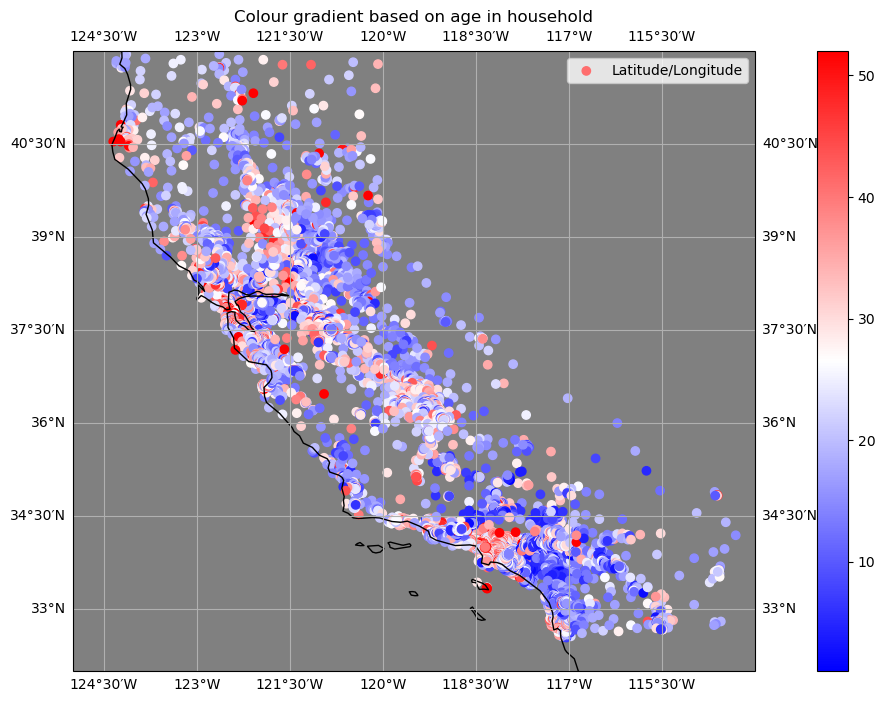

In [9]:
# Setting up new colour axis
z2 = np.asarray(df_cleaned['housing_median_age'])  

# Finding max and min age in dataset
max_age = df_cleaned['housing_median_age'].max()
min_age = df_cleaned['housing_median_age'].min()


# Create a figure and an axis with a map projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(min_age, max_age)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.04, pad=0.08)

ax.scatter(x, y, c=z2, label='Latitude/Longitude', cmap='bwr')  

ax.set_title("Colour gradient based on age in household") 
ax.legend() 

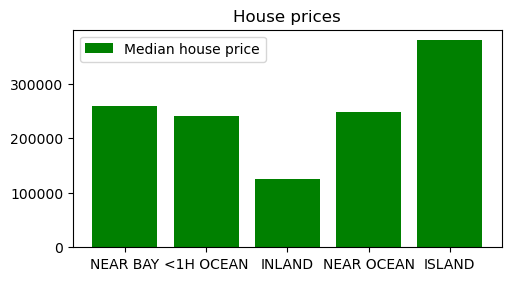

In [10]:
# Finding unique values values in the ocen proximity data for plotting
x_proximity = np.asarray(df_cleaned['ocean_proximity'].unique())

# Creating a list of mean values from house prices based on proximity to ocean.
mean_list = []
for i in x_proximity:
    mean_list.append(df_cleaned.loc[df_cleaned['ocean_proximity'] == i]['median_house_value'].mean()) 
    
y_mean = np.asarray(mean_list) # You can pass the list directly as well but it is recommended to use numpy arrays in matplotlib

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.bar(x_proximity, y_mean, label='Median house price', color='g') 
ax.set_title("House prices")
ax.legend()

# print(x_proximity)

Text(0.5, 1.0, 'Colour gradient based on proximity to ocean\nRed = ISLAND, White = NEAR OCEAN, Light-Blue = <1H OCEAN,\n Light-Red = NEAR BAY, Blue = INLAND ')

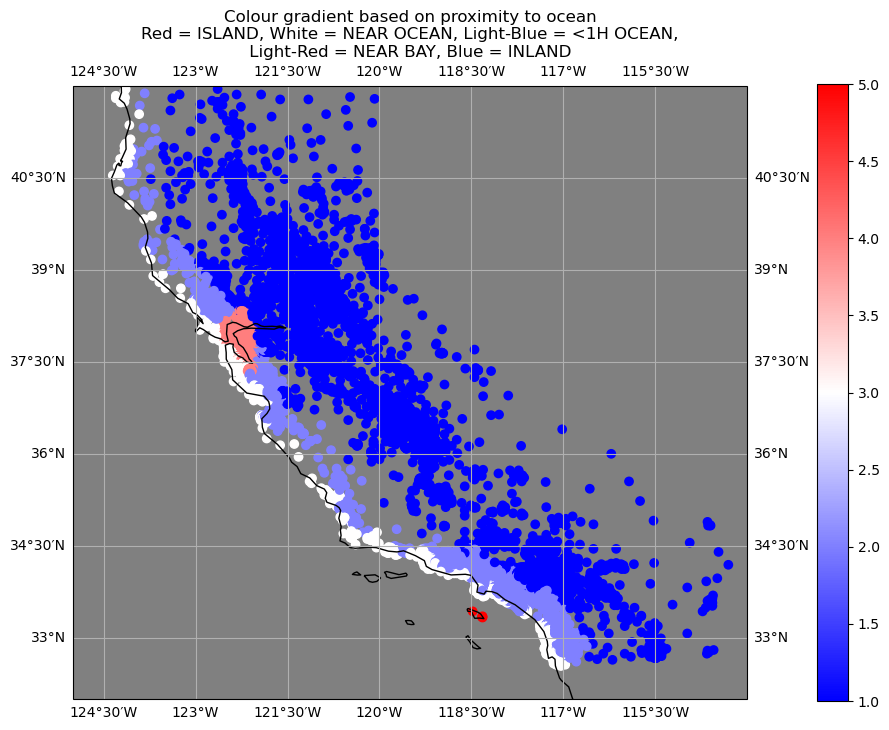

In [11]:
# Setting up a new colour axis

proximity_list = []

# Assigning numerical value to ocean proximity to map colours
for i in df_cleaned['ocean_proximity']:
    if i == 'NEAR BAY':
        proximity_list.append(4)
    
    if i == '<1H OCEAN':
        proximity_list.append(2)
    
    if i == 'NEAR OCEAN':
        proximity_list.append(3)
    
    if i == 'ISLAND':
        proximity_list.append(5)
    
    if i == 'INLAND':
        proximity_list.append(1)
        
z3 = np.asarray(proximity_list)  

# Create a figure and an axis with a map projection and a specific background colour
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(1, 5)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.0398, pad=0.09)

# Creating the plot
ax.scatter(x, y, c=z3, cmap='bwr')  

ax.set_title("Colour gradient based on proximity to ocean\nRed = ISLAND, White = NEAR OCEAN, Light-Blue = <1H OCEAN,\n Light-Red = NEAR BAY, Blue = INLAND ") 
#ax.legend() 

Text(0.5, 1.0, 'Colour gradient based on average size of homes')

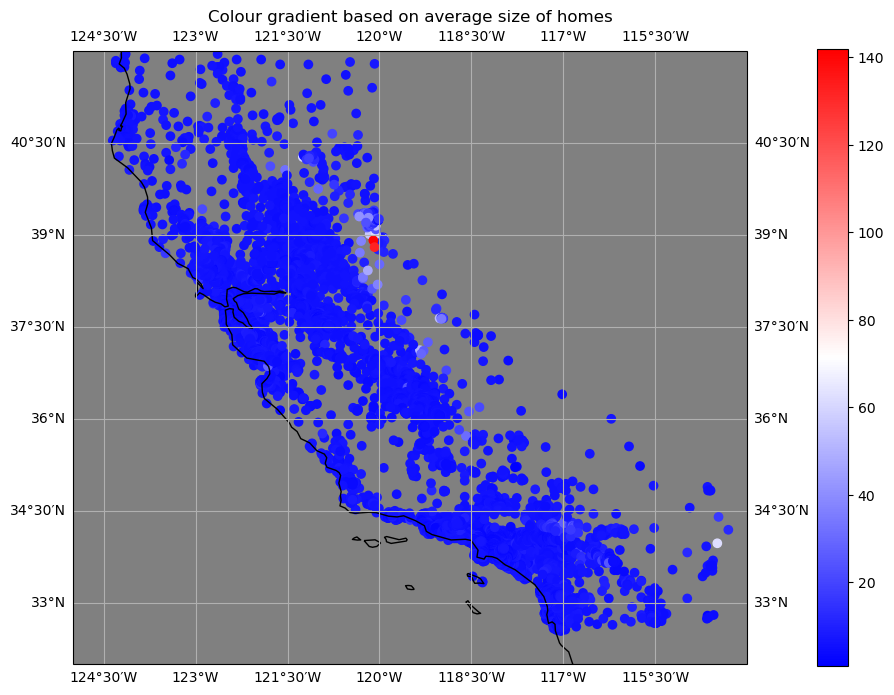

In [12]:
# Creating a calculated data range that represents the total rooms per household.
df_size_of_homes = df_cleaned['total_rooms']/df_cleaned['households']


# Setting up new colour axis
z4 = np.asarray(df_size_of_homes)  

# Finding largest and smallest homes
max_size = df_size_of_homes.max()
min_size = df_size_of_homes.min()

# Create a figure and an axis with a map projection and a specific background colour
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(min_size, max_size)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.0398, pad=0.09)

# Creating the plot
ax.scatter(x, y, c=z4, cmap='bwr')  

ax.set_title("Colour gradient based on average size of homes") 

# We have an extreme discrepancy in the data. 
For some reason there is a small community with an average of 140 rooms in inland california.
This doesn't seem right. Lets research and normalize that. 

In [13]:
# Add our house size column to the DF to make it easier to keep order
df_size_col = df_cleaned.assign(size_of_homes = df_size_of_homes)

# Finding the outliers by sorting in descending order
df_descending = df_size_col.sort_values(by="size_of_homes", ascending= False)

#print(df_size_of_homes.head(10))
print(df_descending.head(20))


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1914     -120.10     38.91                33.0       1561.0           282.0   
1979     -120.08     38.80                34.0       1988.0           511.0   
12447    -114.49     33.97                17.0       2809.0           635.0   
1913     -120.06     39.01                19.0       2967.0           528.0   
11862    -121.25     40.27                25.0        958.0           245.0   
1912     -120.16     39.01                16.0       1463.0           264.0   
9676     -119.02     37.64                14.0       5919.0          1278.0   
11707    -120.06     39.15                22.0       2213.0           372.0   
2395     -119.34     37.12                23.0       1881.0           380.0   
1240     -120.19     38.42                11.0       1568.0           369.0   
11832    -120.33     39.30                16.0        868.0           178.0   
11833    -120.18     39.28                14.0      

# Lets look at the data
The data is now sorted in descending order from the largest homes to the smallest. If we look at the size of home column we can see a rapid change during the first ten rows. Then the rate of change slows down considerably.
This might be errors in the data or it might be outliers in the genuine data. Either way it skews our graph. Lets drop those lines and see what we get.

In [14]:
# Dropping the first 10 rows based on the index from the descending dataframe we got previously.
df_dropped_rows =  df_descending.drop(df_descending.index[0:10])

# print(df_dropped_rows.head(10))

# Lets graph our data again

Text(0.5, 1.0, 'Colour gradient based on average size of homes')

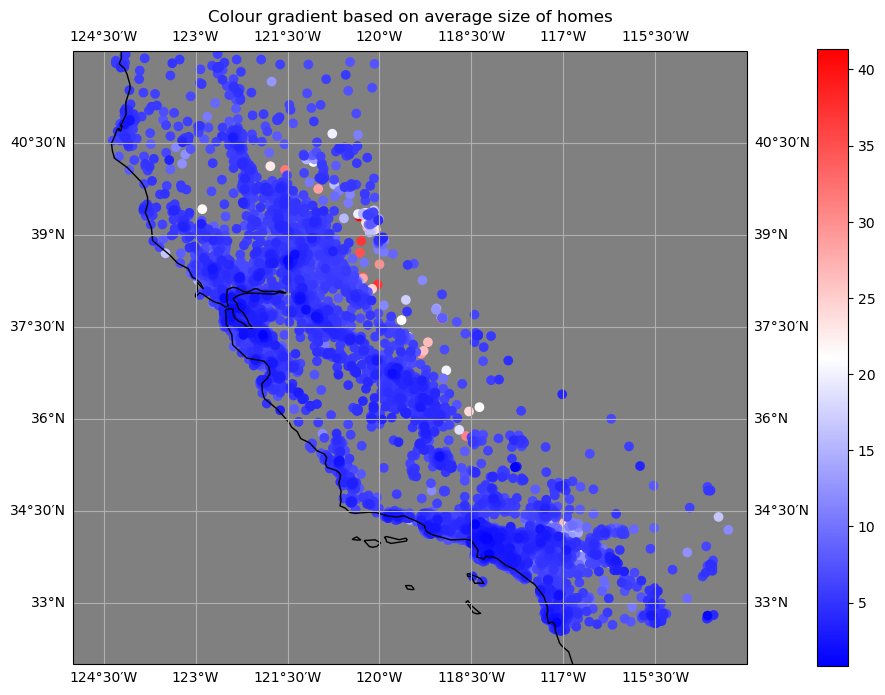

In [15]:

# Set up new latitudes and longitudes based on our cleaned dataframe
x1 = np.asarray(df_dropped_rows['longitude']) 
y1 = np.asarray(df_dropped_rows['latitude'])

# Setting up new colour axis based on our cleaned dataframe
z5 = np.asarray(df_dropped_rows['size_of_homes'])  

# Finding largest and smallest homes
max_size = df_dropped_rows['size_of_homes'].max()
min_size = df_dropped_rows['size_of_homes'].min()

# Create a figure and an axis with a map projection and a specific background colour
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(min_size, max_size)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.0398, pad=0.09)

# Creating the plot
ax.scatter(x1, y1, c=z5, cmap='bwr')  

ax.set_title("Colour gradient based on average size of homes") 

This gives us a bit more range in the colour but it is still a bit skewed based on a few inland households being very large. Lets drop some more outliers and see what happens.

Text(0.5, 1.0, 'Colour gradient based on average size of homes')

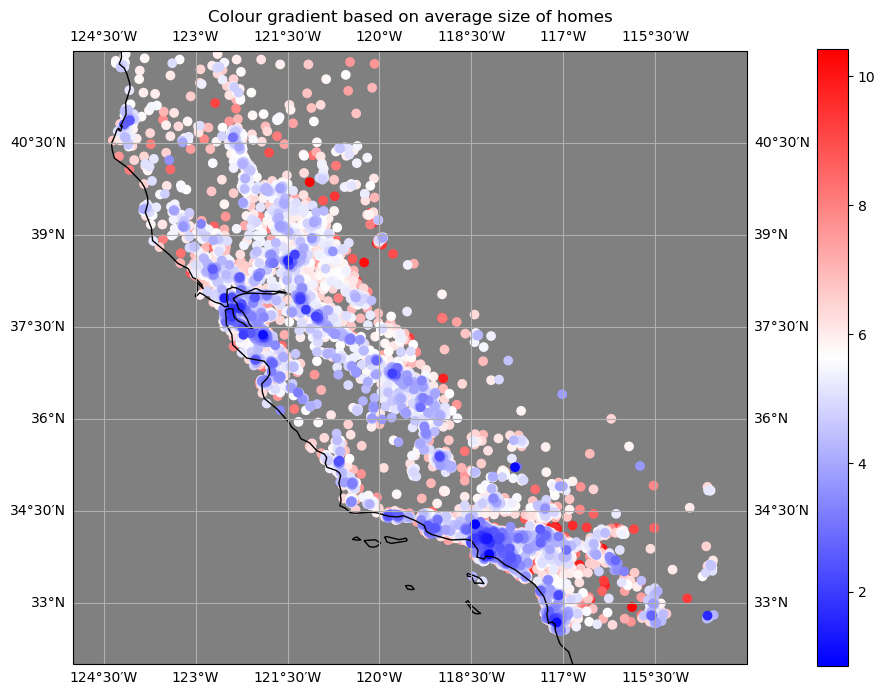

In [ ]:
# Dropping the first 200 rows based on the index from the descending dataframe we got previously.
df_dropped_rows =  df_descending.drop(df_descending.index[0:200])

# Set up new latitudes and longitudes based on our cleaned dataframe
x1 = np.asarray(df_dropped_rows['longitude']) 
y1 = np.asarray(df_dropped_rows['latitude'])

# Setting up new colour axis based on our cleaned dataframe
z5 = np.asarray(df_dropped_rows['size_of_homes'])  

# Finding largest and smallest homes
max_size = df_dropped_rows['size_of_homes'].max()
min_size = df_dropped_rows['size_of_homes'].min()

# Create a figure and an axis with a map projection and a specific background colour
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_facecolor("grey")

# Set up the map extent [West, East, South, North]
ax.set_extent([-125, -114, 32, 42]) # Lat and Lon bounds for california based on the supplied data
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Setting up the colourbar, size and scale
norm = colors.Normalize(min_size, max_size)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax, fraction=0.0398, pad=0.09)

# Creating the plot
ax.scatter(x1, y1, c=z5, cmap='bwr')  

ax.set_title("Colour gradient based on average size of homes") 

When we have removed the 200 largest housholds we see a clearer pattern with small homes closer to the suburban areas of San Fransisco and Los Angeles and larger housholds more inland. 

But what about the two housholds with 130 and 140 rooms? lets extract the location and see where we are on a map.

In [17]:

print(f'Location 1 lat/lon: {df_descending.iloc[0]['latitude']}, {df_descending.iloc[0]['longitude']}')
print(f'Location 2 lat(lon: {df_descending.iloc[1]['latitude']}, {df_descending.iloc[1]['longitude']}')


location_1 = (df_descending.iloc[0]['latitude'], df_descending.iloc[0]['longitude'])
location_2 = (df_descending.iloc[1]['latitude'], df_descending.iloc[1]['longitude'])

m = folium.Map(location=(38.85, -120.09),
               zoom_start=12)

folium.Marker(
    location=location_1,
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="green"),
).add_to(m)

folium.Marker(
    location=location_2,
    popup="Timberline Lodge",
    icon=folium.Icon(icon="green"),
    ).add_to(m)
m


Location 1 lat/lon: 38.91, -120.1
Location 2 lat(lon: 38.8, -120.08


So we are west of South Lake Tahoe, I looked up the positions and the southern most point appears to be a ski-resort which can explain the discrepancy in the amount of rooms.

The northern point is a bit more perplexing. It is just north of Mount Tallac and appears to be in the wilderness in the middle of nowhere. So why there would be 15 households with almost 2000 rooms here I have no idea. But lets move on.

Text(0, 0.5, 'Population')

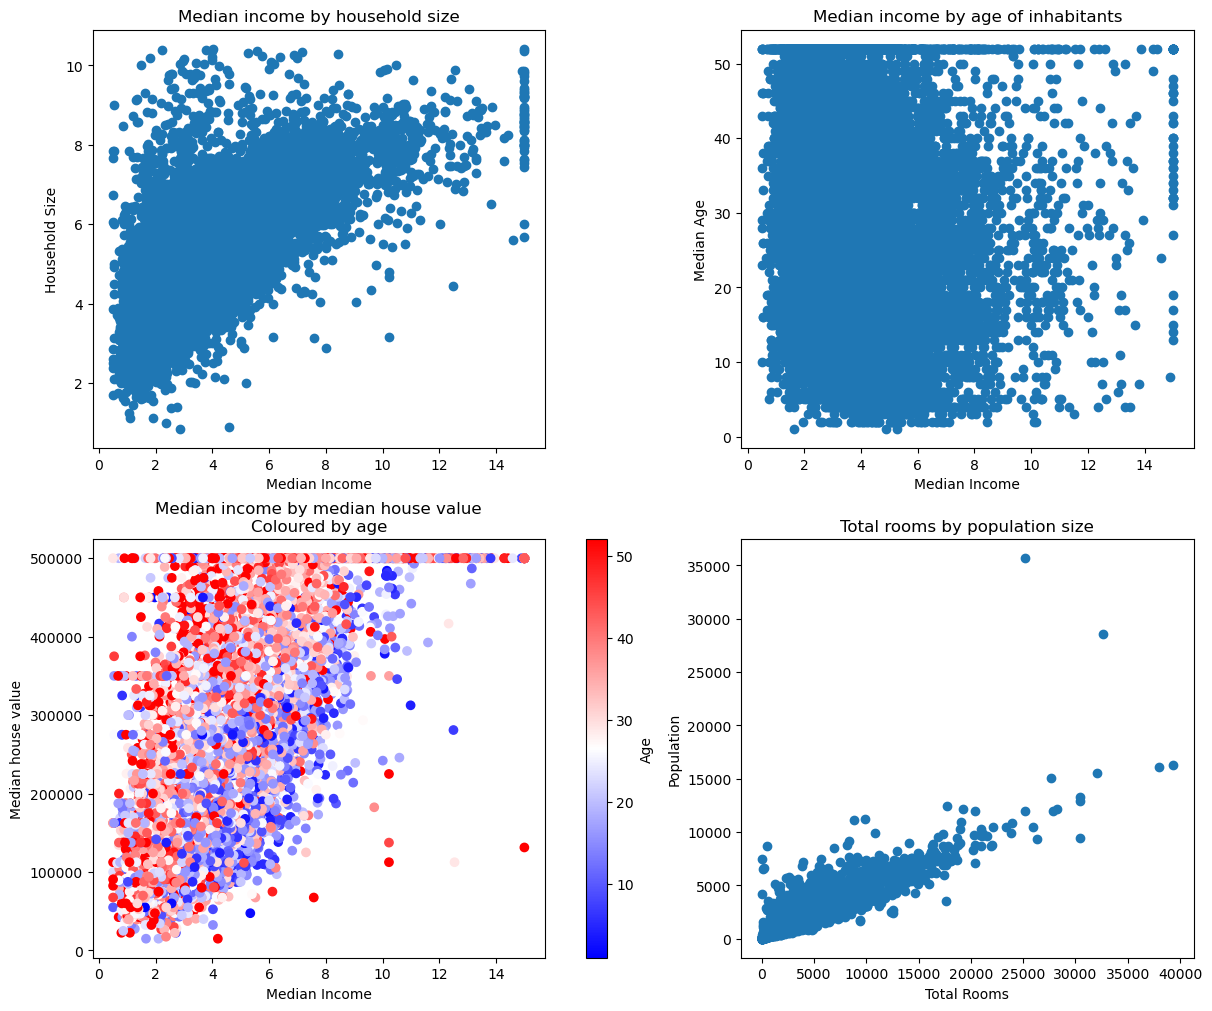

In [20]:
# Lets continue with our cleaned data without the top 400 outliers

# Set up new x and y data based on our cleaned dataframe
x2 = np.asarray(df_dropped_rows['median_income']) 
y2 = np.asarray(df_dropped_rows['size_of_homes'])

x3 = np.asarray(df_dropped_rows['median_income']) 
y3 = np.asarray(df_dropped_rows['housing_median_age'])

x4 = np.asarray(df_dropped_rows['median_income']) 
y4 = np.asarray(df_dropped_rows['median_house_value'])
z6 = np.asarray(df_dropped_rows['housing_median_age'])

x5 = np.asarray(df_dropped_rows['total_rooms']) 
y5 = np.asarray(df_dropped_rows['population'])

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained')

# Creating the plot
ax[0,0].scatter(x2, y2)
ax[0,1].scatter(x3, y3) 

plot_3 = ax[1,0].scatter(x4, y4, c=z6, cmap='bwr') 
# Setting up the colourbar, size and scale
norm = colors.Normalize(min_age, max_age)
fig.colorbar(cm.ScalarMappable(norm, cmap='bwr'), ax=ax[1,0], fraction=0.08, pad=0.09, label='Age')


ax[1,1].scatter(x5, y5) 


# Adding label to the data
ax[0,0].set_title("Median income by household size") 
ax[0,0].set_xlabel('Median Income') 
ax[0,0].set_ylabel('Household Size')  

ax[0,1].set_title("Median income by age of inhabitants") 
ax[0,1].set_xlabel('Median Income') 
ax[0,1].set_ylabel('Median Age')  

ax[1,0].set_title("Median income by median house value\nColoured by age") 
ax[1,0].set_xlabel('Median Income') 
ax[1,0].set_ylabel('Median house value')  

ax[1,1].set_title("Total rooms by population size") 
ax[1,1].set_xlabel('Total Rooms') 
ax[1,1].set_ylabel('Population')  



In [19]:
print(df_dropped_rows.head(10))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6727     -118.12     34.12                52.0       2907.0           317.0   
2763     -115.88     32.93                15.0        208.0            49.0   
11850    -121.14     39.86                16.0       2534.0           557.0   
1907     -120.04     38.86                16.0       2708.0           481.0   
8847     -118.40     34.09                45.0       2686.0           283.0   
13957    -117.13     34.17                17.0       1181.0           271.0   
13361    -117.61     34.01                25.0        352.0            41.0   
5249     -118.45     34.08                52.0       1500.0           176.0   
13951    -117.13     34.24                17.0       2828.0           506.0   
13177    -117.78     33.97                 2.0        556.0            63.0   

       population  households  median_income  median_house_value  \
6727        956.0       279.0        15.0001            500001